In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

#### Comparing Histograms (Recap)

In [154]:
#Load data
goals = Table.read_table('big5.csv').select(3, 9, 6, 10)
#relabel columns
goals = goals.relabeled(1, 'Home').relabeled(3, 'Away')
goals

Team.1,Home,Team.2,Away
Aston Villa FC,3,Manchester United FC,1
Blackburn Rovers FC,1,Queens Park Rangers FC,0
Chelsea FC,0,Everton FC,0
Liverpool FC,1,Sheffield Wednesday FC,0
Manchester City FC,1,Tottenham Hotspur FC,1
Newcastle United FC,3,Coventry City FC,0
Southampton FC,3,Nottingham Forest FC,4
West Ham United FC,1,Leeds United FC,2
Wimbledon FC,3,Bolton Wanderers FC,2
Arsenal FC,1,Middlesbrough FC,1


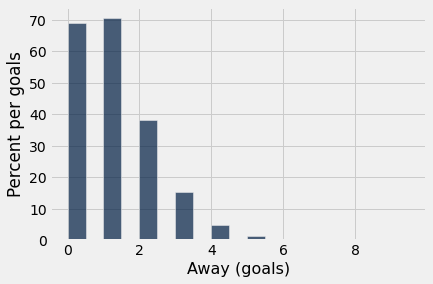

In [155]:
# Recap: What does height represent/what does area represent?
goals.hist('Away', unit = 'goals', bins = np.arange(0,10,0.5))

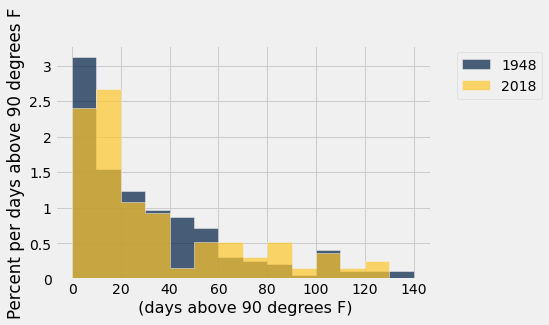

In [156]:
climate = Table.read_table('NOAA.csv').relabeled(5, '1948').relabeled(6, '2018')
#How to get actual counts on the y-axis instead of percent/unit
#Does it always make sense?
climate.hist(5, 6, unit = 'days above 90 degrees F', 
             bins = np.arange(0,150,10)) #TODO: add, normed = False)

## Groups

In [38]:
# load cones.csv
all_cones = Table.read_table('cones.csv')
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [161]:
# TODO: recap creating/ applying a function
# create function to half the prices of columns above and add the result as a new column


In [164]:
# TODO: group by 'Flavor'


In [165]:
# TODO: group by 'Flavor', but now looking at average (Price) instead of count/len


## Grouping by 2 attributes/columns

In [166]:
#TODO: group by flavor and color

### Let's look at 2 categorical variables in a bigger data set
Grouping by 2 different attributes/columns

In [69]:
nba = Table.read_table('nba_salaries.csv').relabeled(4, 'SALARY')
nba

RANK,PLAYER,POSITION,TEAM,SALARY
1,Kobe Bryant,SF,Los Angeles Lakers,25
2,Joe Johnson,SF,Brooklyn Nets,24.8949
3,LeBron James,SF,Cleveland Cavaliers,22.9705
4,Carmelo Anthony,SF,New York Knicks,22.875
5,Dwight Howard,C,Houston Rockets,22.3594
6,Chris Bosh,PF,Miami Heat,22.1927
7,Chris Paul,PG,Los Angeles Clippers,21.4687
8,Kevin Durant,SF,Oklahoma City Thunder,20.1586
9,Derrick Rose,PG,Chicago Bulls,20.0931
10,Dwyane Wade,SG,Miami Heat,20


#### Question: Which NBA teams spent the most on their “starters” in 2015-2016?
Assum the “starter” for a team & position is the player with the highest salary on that team in that position


In [167]:
#TODO: drop data that we are not interested in


In [168]:
#TODO: group by TEAM & position, should we just look at the count?


## Pivot: another way to look at 2 categorical variables

In [169]:
#TODO: Revisit our simple table of cones



In [170]:
#TODO: Can we look at something else but count? Maybe the average price?


In [171]:
nba

POSITION,TEAM,SALARY
SF,Los Angeles Lakers,25
SF,Brooklyn Nets,24.8949
SF,Cleveland Cavaliers,22.9705
SF,New York Knicks,22.875
C,Houston Rockets,22.3594
PF,Miami Heat,22.1927
PG,Los Angeles Clippers,21.4687
SF,Oklahoma City Thunder,20.1586
PG,Chicago Bulls,20.0931
SG,Miami Heat,20


#### Revisit Question: Which NBA teams spent the most on their “starters” in 2015-2016?
Assum the “starter” for a team & position is the player with the highest salary on that team in that position

### Comparing distributions, answering questions about associations
Let's use what we learned using group, pivot, functions
Data set from https://data.ca.gov/dataset/ca-educational-attainment-personal-income/resource/26201f19-4469-4311-a819-bbbd3e557eda
Represents the education and income data for California Adults (2008 - 2014)

In [173]:
full_table = Table.read_table('educ_inc.csv')
full_table

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
1/1/08 0:00,00 to 17,Male,No high school diploma,"F: 35,000 to 49,999",2227
1/1/08 0:00,00 to 17,Male,No high school diploma,"E: 25,000 to 34,999",2606
1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","D: 15,000 to 24,999",3465
1/1/08 0:00,00 to 17,Male,No high school diploma,"D: 15,000 to 24,999",3974
1/1/08 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",4233


In [174]:
#Only look at adults (18+) in 2014
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where(
    'Age', are.not_equal_to('00 to 17')).drop(0)
ca_2014

Age,Gender,Educational Attainment,Personal Income,Population Count
18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [177]:
#Let's focus in on adults qho are between 18 - 64, 
#let's narrow in on that age group
ca_2014 = ca_2014.where('Age', '18 to 64')
ca_2014
#TODO: can we look at just 2 attributes/columns and use pivot to cross-classify
# step 1: drop unnecessary columns
#step 2: use pivot

Age,Gender,Educational Attainment,Personal Income,Population Count
18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
18 to 64,Female,No high school diploma,"F: 35,000 to 49,999",43218
18 to 64,Female,High school or equivalent,"H: 75,000 and over",52375
18 to 64,Male,No high school diploma,"H: 75,000 and over",54734
18 to 64,Male,Bachelor's degree or higher,"B: 5,000 to 9,999",86481
18 to 64,Male,Bachelor's degree or higher,"C: 10,000 to 14,999",104462
18 to 64,Male,No high school diploma,"G: 50,000 to 74,999",104646
18 to 64,Female,No high school diploma,"E: 25,000 to 34,999",120389
18 to 64,Female,High school or equivalent,"G: 50,000 to 74,999",128589


In [116]:
# Is this information easy to interpret? How about looking at percent?

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",540746,925063,1075498,1099991
"B: 5,000 to 9,999",235456,659280,505102,398455
"C: 10,000 to 14,999",311403,668055,473189,421796
"D: 15,000 to 24,999",586698,1039692,974012,738103
"E: 25,000 to 34,999",559400,899202,786774,408849
"F: 35,000 to 49,999",888551,964828,663369,238106
"G: 50,000 to 74,999",1342473,767541,451100,119281
"H: 75,000 and over",2581887,650766,279890,56792


In [122]:
def percent(values):
    return np.round(values/sum(values) * 100,2)

In [178]:
#TODO: use the function percent to create a distribution table

In [179]:
#TODO: visualize to see if there is an association (barh())

## Combining 2 tables using join

In [132]:
# Create a table of drinks
drinks = Table(['Drink','Cafe','Price']).with_rows([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli', 2],
    ['Latte', 'Nefeli', 3],
    ['Espresso', "Abe's", 2]])
drinks

Drink,Cafe,Price
Milk Tea,Tea One,4
Espresso,Nefeli,2
Latte,Nefeli,3
Espresso,Abe's,2


In [134]:
discounts = Table(). with_columns(
    'Coupon % off', make_array(25,50,5),
    'Location', make_array('Tea One', 'Nefeli', 'Tea One'))
discounts

Coupon % off,Location
25,Tea One
50,Nefeli
5,Tea One


In [180]:
#TODO: create a combined table using join

In [181]:
#TODO: add a reduced price column

## SF Bike Share Example

In [182]:
#Ride share example
trips = Table.read_table('trip.csv')
trips

id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


In [183]:
#TODO: try visualizing a histogram of duration of bike use, is this useful?


In [184]:
#TODO: let's narrow it down to useful data (maybe duration up to 30 min)


In [185]:
# Try histogram again, what can we learn from this histogram?



In [186]:
# how about cross-classifying? let's look at most popular start station


In [187]:
# How about most popular start to end?
